<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocesamiento de Datos
## Tarea 4 
## Normalización y estándarización

In [3]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=92e422d05ac22cfa245d2e248707c14e691e9d9cee9a094610f93c1c32d99cf3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [4]:
#Tratamiento de datos
#====================================
import pandas as pd
import numpy as np

#Graficos
#====================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y análisis
#====================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

plt.style.use('ggplot')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/RDLL/curso_mineria_de_datos/main/newhepatitis.csv')
df.head(n=10)

,Unnamed: 0,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,0,30,male,False,False,False,False,False,False,False,...,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,1,50,female,False,False,True,False,False,False,False,...,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,3,31,female,NaN,True,False,False,False,True,False,...,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
3,5,34,female,True,False,False,False,False,True,False,...,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
4,6,51,female,False,False,True,False,True,True,False,...,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
5,7,23,female,True,False,False,False,False,True,False,...,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
6,8,39,female,True,False,True,False,False,True,True,...,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
7,9,30,female,True,False,False,False,False,True,False,...,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live
8,10,39,female,False,True,False,False,False,False,True,...,False,False,False,1.30,78.0,30.000000,4.400000,85.0,False,live
9,12,41,female,True,True,True,False,False,True,True,...,False,False,False,0.90,81.0,60.000000,3.900000,52.0,False,live


In [7]:
columnas=["age", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]
datos = df[columnas].copy()
datos

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.00,85.0,18.000000,4.000000,NaN
1,50,0.90,135.0,42.000000,3.500000,NaN
2,31,0.70,46.0,52.000000,4.000000,80.000000
3,34,0.90,95.0,28.000000,4.000000,75.000000
4,51,0.95,91.6,34.666667,4.133333,77.000000
...,...,...,...,...,...,...
111,36,0.60,120.0,30.000000,4.000000,45.000000
112,44,0.90,126.0,142.000000,4.300000,49.333333
113,61,0.80,75.0,20.000000,4.100000,48.666667
114,53,1.50,81.0,19.000000,4.100000,48.000000


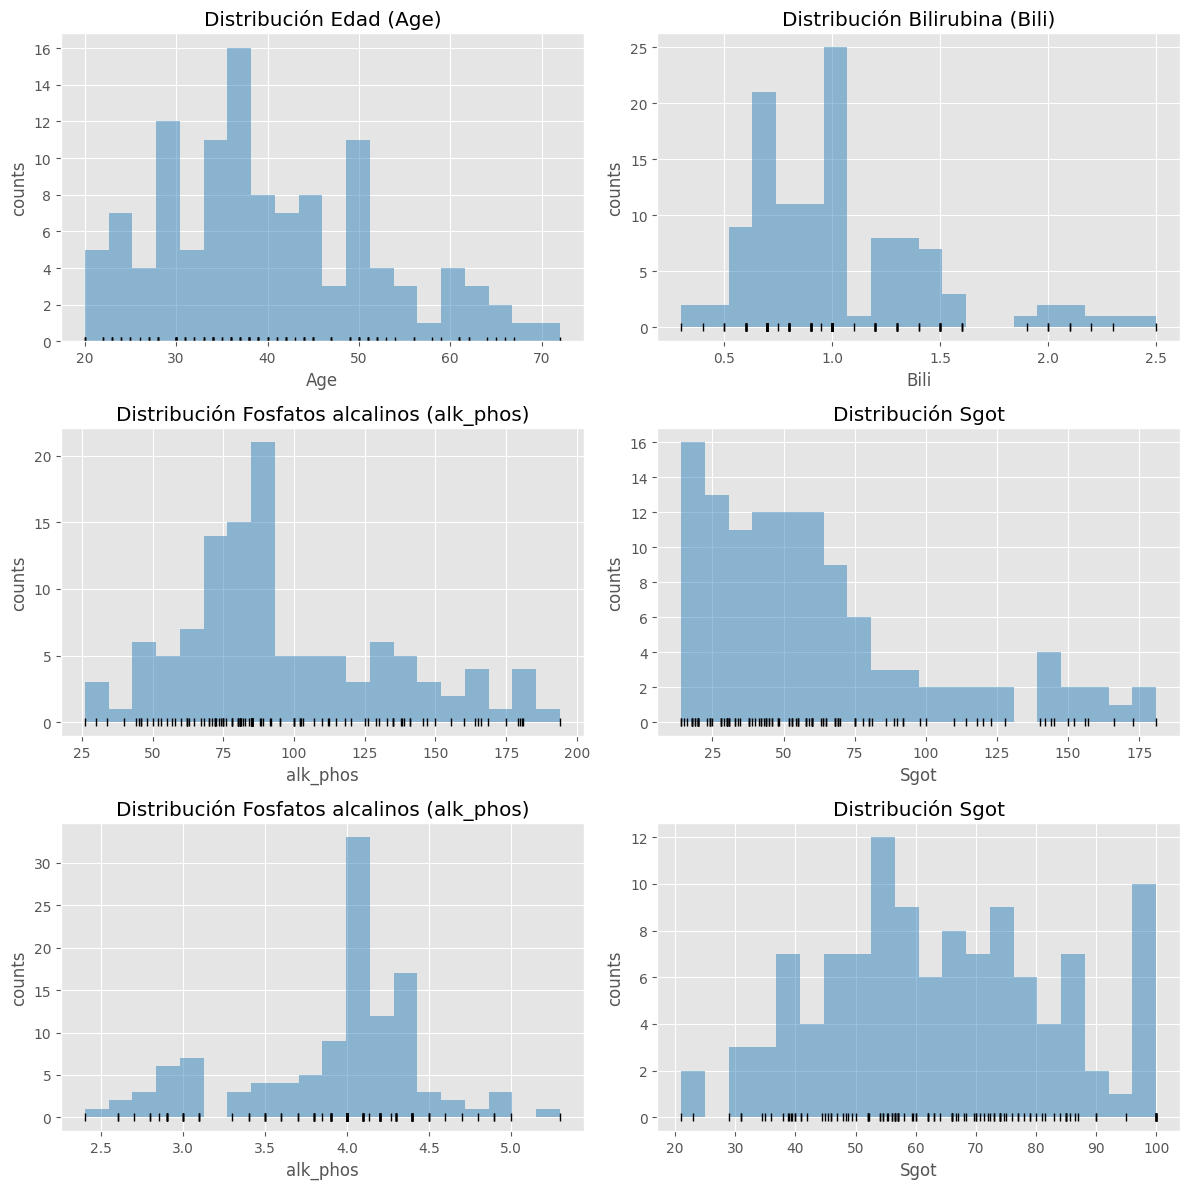

In [15]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axs[0][0].hist(x=datos.age, bins=20, color="#3182bd", alpha=0.5)
axs[0][0].plot(datos.age, np.full_like(datos.age, -0.01), '|k', markeredgewidth=1)
axs[0][0].set_title('Distribución Edad (Age)')
axs[0][0].set_xlabel('Age')
axs[0][0].set_ylabel('counts')

axs[0][1].hist(x=datos.bilirubin, bins=20, color="#3182bd", alpha=0.5)
axs[0][1].plot(datos.bilirubin, np.full_like(datos.bilirubin, -0.01), '|k', markeredgewidth=1)
axs[0][1].set_title('Distribución Bilirubina (Bili)')
axs[0][1].set_xlabel('Bili')
axs[0][1].set_ylabel('counts')

axs[1][0].hist(x=datos.alk_phosphate, bins=20, color="#3182bd", alpha=0.5)
axs[1][0].plot(datos.alk_phosphate, np.full_like(datos.alk_phosphate, -0.01), '|k', markeredgewidth=1)
axs[1][0].set_title('Distribución Fosfatos alcalinos (alk_phos)')
axs[1][0].set_xlabel('alk_phos')
axs[1][0].set_ylabel('counts')

axs[1][1].hist(x=datos.sgot, bins=20, color="#3182bd", alpha=0.5)
axs[1][1].plot(datos.sgot, np.full_like(datos.sgot, -0.01), '|k', markeredgewidth=1)
axs[1][1].set_title('Distribución Sgot')
axs[1][1].set_xlabel('Sgot')
axs[1][1].set_ylabel('counts')

axs[2][0].hist(x=datos.albumin, bins=20, color="#3182bd", alpha=0.5)
axs[2][0].plot(datos.albumin, np.full_like(datos.albumin, -0.01), '|k', markeredgewidth=1)
axs[2][0].set_title('Distribución Fosfatos alcalinos (alk_phos)')
axs[2][0].set_xlabel('alk_phos')
axs[2][0].set_ylabel('counts')

axs[2][1].hist(x=datos.protime, bins=20, color="#3182bd", alpha=0.5)
axs[2][1].plot(datos.protime, np.full_like(datos.protime, -0.01), '|k', markeredgewidth=1)
axs[2][1].set_title('Distribución Sgot')
axs[2][1].set_xlabel('Sgot')
axs[2][1].set_ylabel('counts')

plt.tight_layout();